# Restricting Model Overfitting

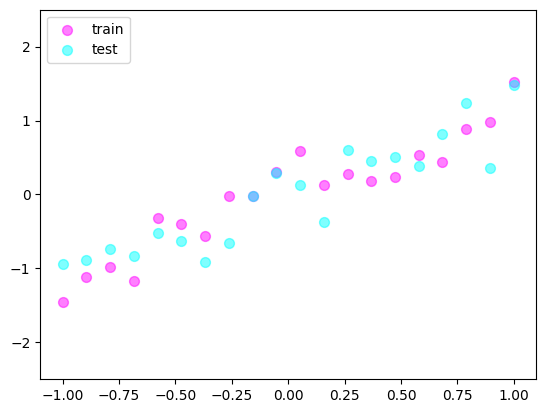

In [2]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline 
torch.manual_seed(1)    
N_SAMPLES = 20  
N_HIDDEN = 300
# training data
# reproducible
x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
y = x + 0.3*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones 
(N_SAMPLES, 1))
x, y = Variable(x), Variable(y)
# test data
test_x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
test_y = test_x + 0.3*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones 
(N_SAMPLES, 1))
test_x, test_y = Variable(test_x), Variable(test_y )
# show data
plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.5, 
label='train')
plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, 
alpha=0.5, label='test')
plt.legend(loc='upper left')
plt.ylim((-2.5, 2.5))
plt.show()

In [3]:
net_overfitting = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1),
)
net_dropped = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.Dropout(0.5),  # drop 50% of the neuron
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.Dropout(0.5),  # drop 50% of the neuron
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1),
)
print(net_overfitting)  # net architecture
print(net_dropped)

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=300, bias=True)
  (4): Dropout(p=0.5, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=300, out_features=1, bias=True)
)


In [4]:
optimizer_ofit = torch.optim.Adam(net_overfitting.parameters(), lr=0.01)
optimizer_drop = torch.optim.Adam(net_dropped.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()

# Visualizing the Model Overfit

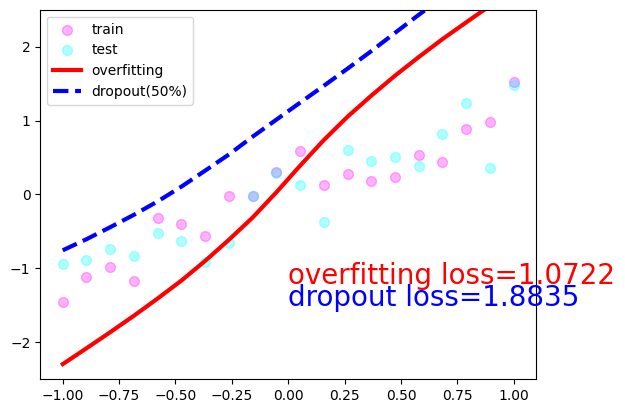

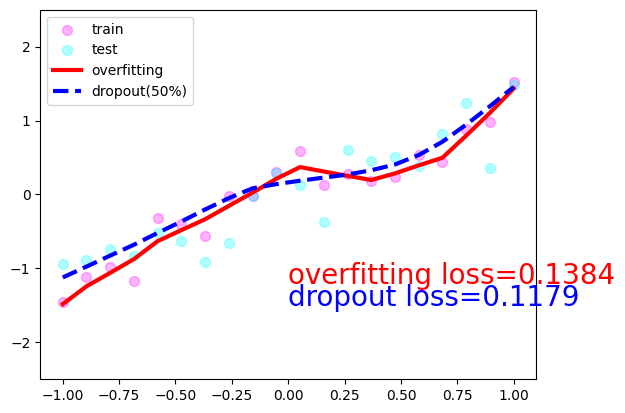

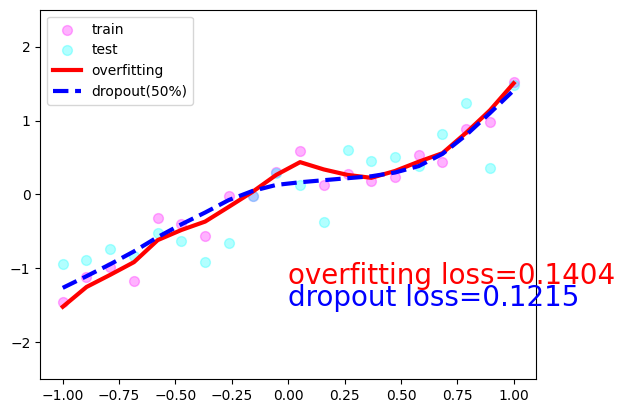

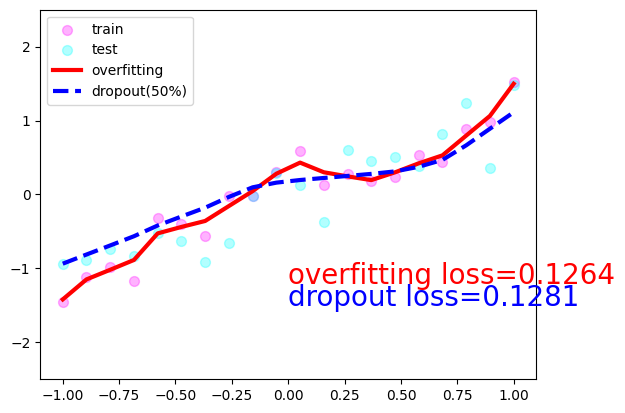

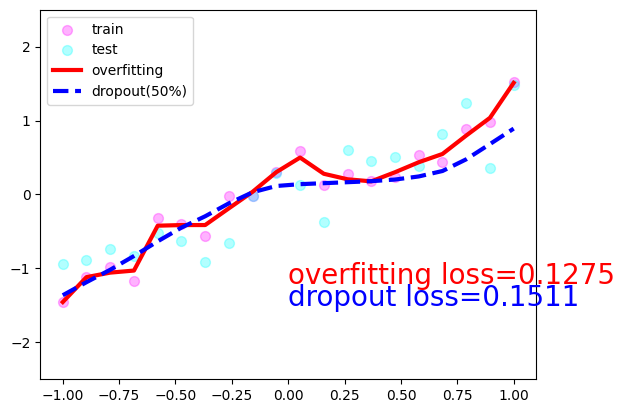

In [5]:
for t in range(500):
    pred_ofit = net_overfitting(x)
    pred_drop = net_dropped(x)
    loss_ofit = loss_func(pred_ofit, y)
    loss_drop = loss_func(pred_drop, y)
    optimizer_ofit.zero_grad()
    optimizer_drop.zero_grad()
    loss_ofit.backward()
    loss_drop.backward()
    optimizer_ofit.step()
    optimizer_drop.step()
    if t % 100 == 0:
        # change to eval mode in order to fix drop out effect
        net_overfitting.eval()
        net_dropped.eval()  # parameters for dropout differ from train mode
        # plotting
        plt.cla()
        test_pred_ofit = net_overfitting(test_x)
        test_pred_drop = net_dropped(test_x)
        plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.3, label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.3, label='test')
        plt.plot(test_x.data.numpy(), test_pred_ofit.data.numpy(), 'r-', lw=3, label='overfitting')
        plt.plot(test_x.data.numpy(), test_pred_drop.data.numpy(), 'b--', lw=3, label='dropout(50%)')
        plt.text(0, -1.2, 'overfitting loss=%.4f' % loss_func(test_pred_ofit, test_y).data, fontdict={'size': 20, 'color': 'red'})
        plt.text(0, -1.5, 'dropout loss=%.4f' % loss_func(test_pred_drop, test_y).data, fontdict={'size': 20, 'color': 'blue'})
        plt.legend(loc='upper left')
        plt.ylim((-2.5, 2.5))
        plt.pause(0.1)
        # change back to train mode
        net_overfitting.train()
        net_dropped.train()
        plt.show()

# Initializing Weights in the Dropout Rate

In [6]:
import numpy as np
import torch
#From a uniform distribution
torch.Tensor(5, 3)

tensor([[9.8001e+01, 1.4391e-42, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [7]:
 #getting the shape of the tensor
 torch.Tensor(5, 3).uniform_(-1, 1)

tensor([[ 0.8790,  0.7375,  0.1182],
        [ 0.3652,  0.1322,  0.8587],
        [ 0.3682, -0.2907,  0.0051],
        [ 0.0886, -0.7588, -0.5371],
        [ 0.0085,  0.0812, -0.6360]])

In [8]:
#getting the shape of the tensor
x_ = torch.Tensor(5, 3).uniform_(-1, 1)
print(x.size())

#Creation from lists & numpy
z_ = torch.LongTensor([[1, 3], [2, 9]])
print(z_.type())
# Cast to numpy ndarray
print(z_.numpy().dtype)

# Data type inferred from numpy
print(torch.from_numpy(np.random.rand(5, 3)).type())
print(torch.from_numpy(np.random.rand(5, 3).astype(np.float32)).type())


torch.Size([20, 1])
torch.LongTensor
int64
torch.DoubleTensor
torch.FloatTensor


In [9]:
def initialize_weights(model, a=-1, b=1):
    for layer in model:
        if isinstance(layer, torch.nn.Linear): #verifica si la capa es lineal
            init.uniform_(layer.weight, a, b) #inicializa los pesos de la capa lineal con una distribucion uniforme
            if layer.bias is not None: #verifica si la capa tiene bias
                init.zeros_(layer.bias) #inicializa los bias a 0

net_overfitting = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1),
)

net_dropped = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.Dropout(0.5),  # drop 50% of the neuron
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.Dropout(0.5),  # drop 50% of the neuron
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1),
)
print(net_overfitting)  # net architecture
print(net_dropped)

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=300, bias=True)
  (4): Dropout(p=0.5, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=300, out_features=1, bias=True)
)


In [10]:
import torch
import torch.nn as nn  # Importante: importar nn también
import torch.nn.init as init  # Importante: importar init


def initialize_weights(model, a=-1, b=1):
    for layer in model:
        if isinstance(layer, nn.Linear):  # Usar nn.Linear aquí también
            init.uniform_(layer.weight, a, b)
            if layer.bias is not None:
                init.zeros_(layer.bias)

initialize_weights(net_overfitting)
# initialize_weights(net_dropped)

print("net_overfitting:")
print(net_overfitting)
print("\nnet_dropped:")
print(net_dropped)

print("\nPesos de la primera capa lineal de net_dropped:")
print(net_dropped[0].weight)
print("\nBias de la primera capa lineal de net_dropped:")
print(net_dropped[0].bias)

net_overfitting:
Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=1, bias=True)
)

net_dropped:
Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=300, bias=True)
  (4): Dropout(p=0.5, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=300, out_features=1, bias=True)
)

Pesos de la primera capa lineal de net_dropped:
Parameter containing:
tensor([[-7.5858e-01],
        [-4.5199e-01],
        [-4.2639e-01],
        [ 3.3290e-01],
        [-5.0142e-01],
        [ 1.4570e-01],
        [-2.1069e-01],
        [ 8.3536e-01],
        [-7.3332e-01],
        [-9.6140e-01],
        [-3.3369e-01],
        [-9.5769e-01],
        [ 6.6914e-01],
        [-8.7310e-01],
        [ 8.1979e-01],
        [ 6.9654e-01],
        [ 9.5930e-01

In [11]:
optimizer_ofit = torch.optim.Adam(net_overfitting.parameters(), lr=0.01)
optimizer_drop = torch.optim.Adam(net_dropped.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()

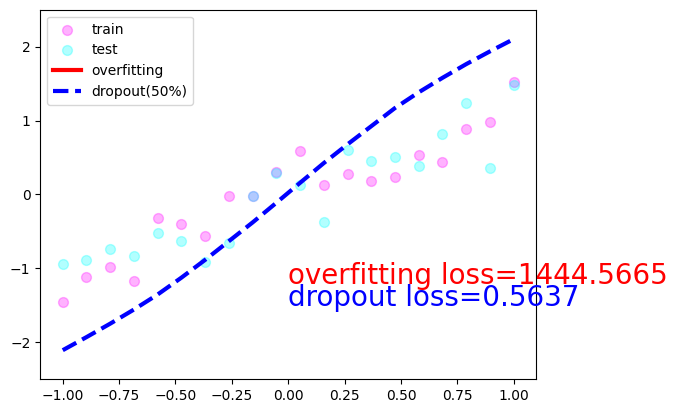

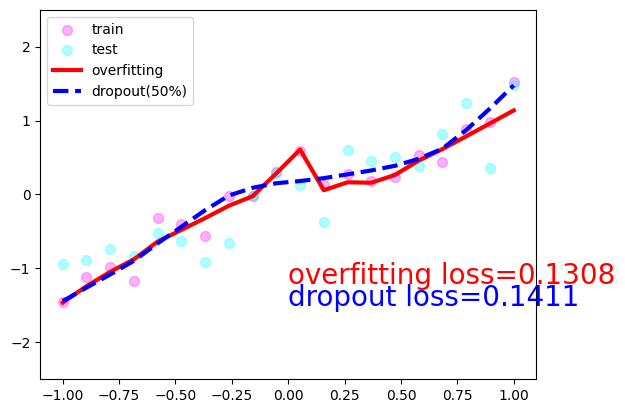

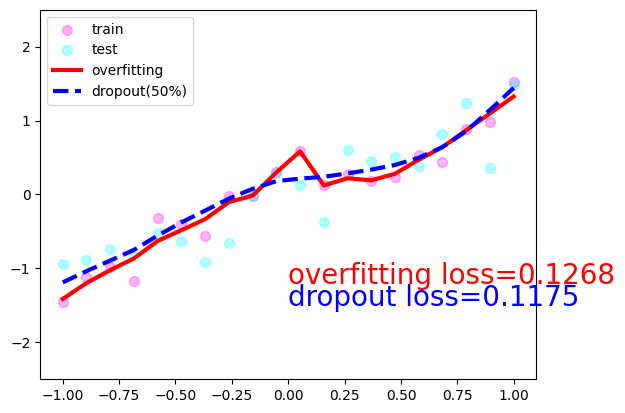

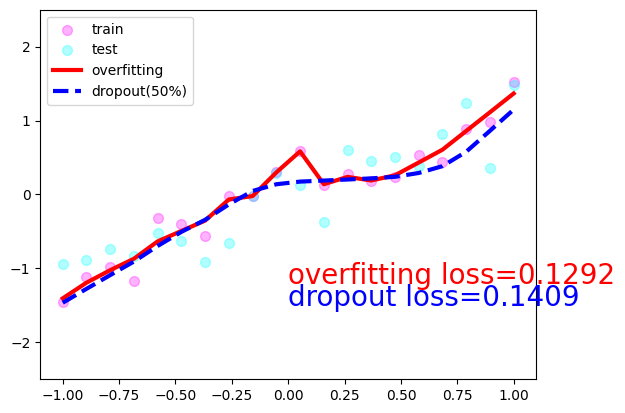

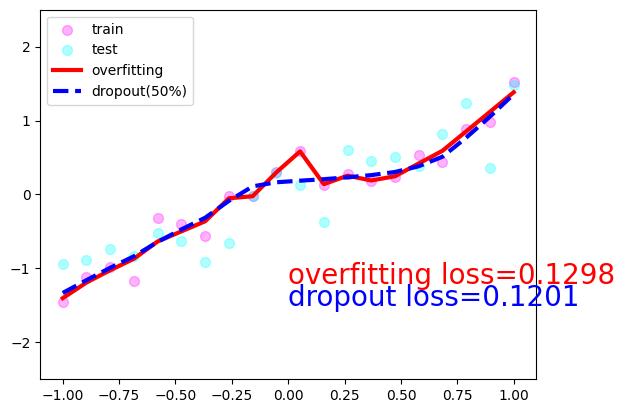

In [12]:
for t in range(500):
    pred_ofit = net_overfitting(x)
    pred_drop = net_dropped(x)
    loss_ofit = loss_func(pred_ofit, y)
    loss_drop = loss_func(pred_drop, y)
    optimizer_ofit.zero_grad()
    optimizer_drop.zero_grad()
    loss_ofit.backward()
    loss_drop.backward()
    optimizer_ofit.step()
    optimizer_drop.step()
    if t % 100 == 0:
        # change to eval mode in order to fix drop out effect
        net_overfitting.eval()
        net_dropped.eval()  # parameters for dropout differ from train mode
        # plotting
        plt.cla()
        test_pred_ofit = net_overfitting(test_x)
        test_pred_drop = net_dropped(test_x)
        plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.3, label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.3, label='test')
        plt.plot(test_x.data.numpy(), test_pred_ofit.data.numpy(), 'r-', lw=3, label='overfitting')
        plt.plot(test_x.data.numpy(), test_pred_drop.data.numpy(), 'b--', lw=3, label='dropout(50%)')
        plt.text(0, -1.2, 'overfitting loss=%.4f' % loss_func(test_pred_ofit, test_y).data, fontdict={'size': 20, 'color': 'red'})
        plt.text(0, -1.5, 'dropout loss=%.4f' % loss_func(test_pred_drop, test_y).data, fontdict={'size': 20, 'color': 'blue'})
        plt.legend(loc='upper left')
        plt.ylim((-2.5, 2.5))
        plt.pause(0.1)
        # change back to train mode
        net_overfitting.train()
        net_dropped.train()
        plt.show()

# Adding Math Operations

In [13]:
#Simple mathematical operations
x= x_
y = x * torch.randn(5, 3)
print(y)

tensor([[ 0.1261,  1.1631, -0.5382],
        [-0.6058,  0.3130, -0.0962],
        [-0.5206,  0.1733, -0.4261],
        [ 0.0395, -0.0135, -0.1063],
        [-0.3166,  0.0225, -0.3898]])


In [14]:
y = x / torch.sqrt(torch.randn(5, 3) ** 2)
print(y)

tensor([[ 0.1354, -2.0306, -4.4200],
        [-1.1680,  1.5674, -1.5860],
        [ 1.0241,  0.1122,  0.9151],
        [ 0.8795,  2.6027, -0.1415],
        [ 0.5702,  0.2706,  0.3316]])


In [15]:
#Broadcasting
print (x.size())
y = x + torch.randn(5, 1)
print(y)

torch.Size([5, 3])
tensor([[ 0.1069, -1.0538, -1.0603],
        [-0.6751,  0.8452, -0.6767],
        [ 1.5860,  0.9889,  1.8517],
        [ 1.4264,  1.5737,  0.7714],
        [-0.0909, -0.3325, -0.2097]])


In [20]:
#Reshape
y = torch.randn(5, 10, 15)
print(y.size())
print(y.view(-1, 15).size())  # Same as doing y.view(50, 15)
print(y.view(-1, 15).unsqueeze(1).size()) # Adds a dimension at index 1.
print(y.view(-1, 15).unsqueeze(1).squeeze().size())
print()
print(y.transpose(0, 1).size())
print(y.transpose(1, 0).size())
print(y.transpose(0, 1).transpose(1, 2).size())
print(y.permute(1, 2, 0).size())

torch.Size([5, 10, 15])
torch.Size([50, 15])
torch.Size([50, 1, 15])
torch.Size([50, 15])

torch.Size([10, 5, 15])
torch.Size([10, 5, 15])
torch.Size([10, 15, 5])
torch.Size([10, 15, 5])


In [21]:
#Repeat
print(y.view(-1, 15).unsqueeze(1).expand(50, 100, 15).size())
print(y.view(-1, 15).unsqueeze(1).expand_as(torch.randn(50, 100, 15)).size())

#Concatenate tensors
# 2 is the dimension over which the tensors are concatenated
print(torch.cat([y, y], 2).size())
# stack concatenates the sequence of tensors along a new dimension.
print(torch.stack([y, y], 0).size())



torch.Size([50, 100, 15])
torch.Size([50, 100, 15])
torch.Size([5, 10, 30])
torch.Size([2, 5, 10, 15])


In [22]:
#Advanced Indexing
y = torch.randn(2, 3, 4)
print(y[[1, 0, 1, 1]].size())
# PyTorch doesn't support negative strides yet so ::-1 does not work.
rev_idx = torch.arange(1, -1, -1).long()
print(y[rev_idx].size())

torch.Size([4, 3, 4])
torch.Size([2, 3, 4])


In [23]:
#Convolution, BatchNorm & Pooling Layers
x = Variable(torch.randn(10, 3, 28, 28))
conv = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), 
    stride=1,
    padding=1, bias=True
)
bn = nn.BatchNorm2d(num_features=32)
pool = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
output_conv = bn(conv(x))
outpout_pool = pool(conv(x))
print('Conv output size : ', output_conv.size())
print('Pool output size : ', outpout_pool.size())

Conv output size :  torch.Size([10, 32, 28, 28])
Pool output size :  torch.Size([10, 32, 14, 14])
